In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB

In [2]:
countries = pd.read_csv('countries of the world.csv')
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [3]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [4]:
countries.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [5]:
len(countries[countries.isna().any(axis=1)])

48

# Clean/remove Nan values

In [6]:
countries_clean = countries.drop(columns = ['Climate', 'Phones (per 1000)', 'Literacy (%)'])

In [7]:
countries_clean.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [8]:
len(countries_clean[countries_clean.isna().any(axis=1)])

19

In [9]:
countries_clean = countries_clean.dropna()

In [10]:
countries_clean.shape

(208, 17)

In [11]:
countries_clean.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [12]:
countries_clean['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [13]:
countries_clean['Region'].count()

208

In [14]:
countries_clean.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"12,13","0,22","87,65","46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"21,09","4,42","74,49","15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"3,22","0,25","96,53","17,14","4,61","0,101","0,6","0,298"
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"2,41","0,24","97,35","45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,0,0,100,"14,17","5,34","0,04","0,18","0,78"


In [15]:
countries_clean.Region.value_counts()

SUB-SAHARAN AFRICA                     49
LATIN AMER. & CARIB                    43
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         23
NEAR EAST                              16
OCEANIA                                15
C.W. OF IND. STATES                    12
EASTERN EUROPE                         11
NORTHERN AFRICA                         5
NORTHERN AMERICA                        3
BALTICS                                 3
Name: Region, dtype: int64

In [16]:
#countries_clean[countries_clean['Region'] == 'NEAR EAST                          ']

In [17]:
countries_clean = countries_clean.replace({'Region':{'ASIA (EX. NEAR EAST)         ': 'Asia',
                                   'C.W. OF IND. STATES': 'Asia',
                                   'C.W. OF IND. STATES ': 'Asia',
                                   'ASIA (EX. NEAR EAST)         ': 'Asia',
                                   'NEAR EAST                          ': 'Asia',
                                   'EASTERN EUROPE                     ': 'Europe',
                                   'WESTERN EUROPE                     ': 'Europe',
                                   'BALTICS                            ':'Europe',
                                   'LATIN AMER. & CARIB    ': 'S. America',
                                   'NORTHERN AFRICA                    ': 'Africa',
                                   'SUB-SAHARAN AFRICA                 ': 'Africa',
                                   'OCEANIA                            ': 'Oceania',
                                   'NORTHERN AMERICA                   ': 'N. America'
                                   
    
}})

In [18]:
countries_clean.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,Asia,31056997,647500,"48,0","0,00","23,06","163,07",700.0,"12,13","0,22","87,65","46,6","20,34","0,38","0,24","0,38"
1,Albania,Europe,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"21,09","4,42","74,49","15,11","5,22","0,232","0,188","0,579"
2,Algeria,Africa,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"3,22","0,25","96,53","17,14","4,61","0,101","0,6","0,298"
5,Angola,Africa,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"2,41","0,24","97,35","45,11","24,2","0,096","0,658","0,246"
6,Anguilla,S. America,13477,102,"132,1","59,80","10,76","21,03",8600.0,0,0,100,"14,17","5,34","0,04","0,18","0,78"


In [19]:
countries_clean['Pop. Density (per sq. mi.)'] = countries_clean['Pop. Density (per sq. mi.)'].str.replace(',', '.').astype(float)
countries_clean['Coastline (coast/area ratio)'] = countries_clean['Coastline (coast/area ratio)'].str.replace(',', '.').astype(float)
countries_clean['Net migration'] = countries_clean['Net migration'].str.replace(',', '.').astype(float)
countries_clean['Infant mortality (per 1000 births)'] = countries_clean['Infant mortality (per 1000 births)'].str.replace(',', '.').astype(float)
countries_clean['Arable (%)'] = countries_clean['Arable (%)'].str.replace(',', '.').astype(float)
countries_clean['Crops (%)'] = countries_clean['Crops (%)'].str.replace(',', '.').astype(float)
countries_clean['Other (%)'] = countries_clean['Other (%)'].str.replace(',', '.').astype(float)
countries_clean['Birthrate'] = countries_clean['Birthrate'].str.replace(',', '.').astype(float)
countries_clean['Deathrate'] = countries_clean['Deathrate'].str.replace(',', '.').astype(float)
countries_clean['Agriculture'] = countries_clean['Agriculture'].str.replace(',', '.').astype(float)
countries_clean['Industry'] = countries_clean['Industry'].str.replace(',', '.').astype(float)
countries_clean['Service'] = countries_clean['Service'].str.replace(',', '.').astype(float)





In [20]:
countries_clean.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,Asia,31056997,647500,48.0,0.00,23.06,163.07,700.0,12.13,0.22,87.65,46.60,20.34,0.380,0.240,0.380
1,Albania,Europe,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
2,Algeria,Africa,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
5,Angola,Africa,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,2.41,0.24,97.35,45.11,24.20,0.096,0.658,0.246
6,Anguilla,S. America,13477,102,132.1,59.80,10.76,21.03,8600.0,0.00,0.00,100.00,14.17,5.34,0.040,0.180,0.780


Region
Africa        [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
Asia          [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
Europe        [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
N. America    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
Oceania       [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
S. America    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

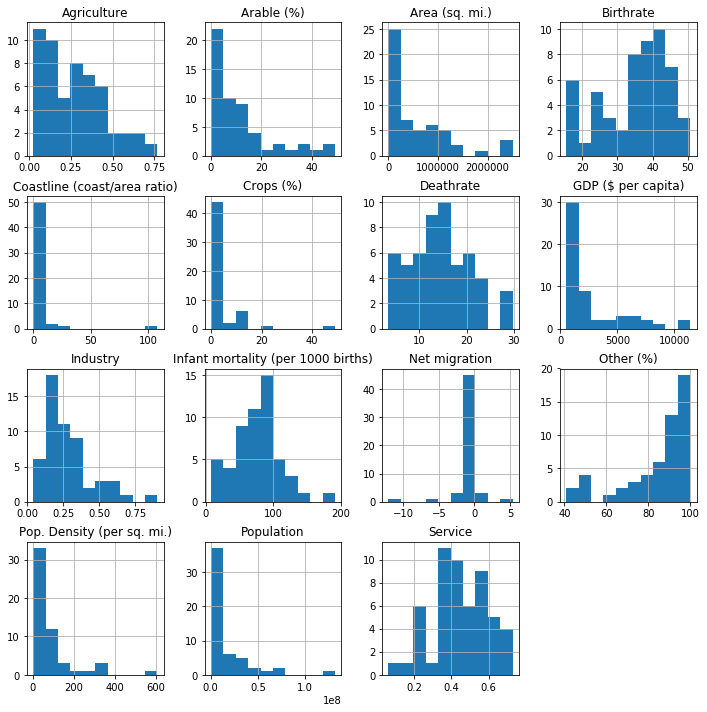

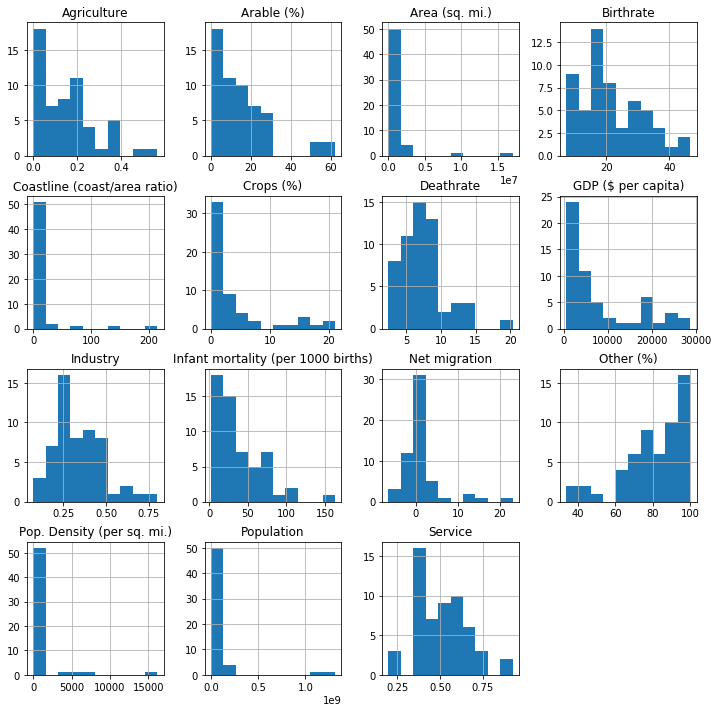

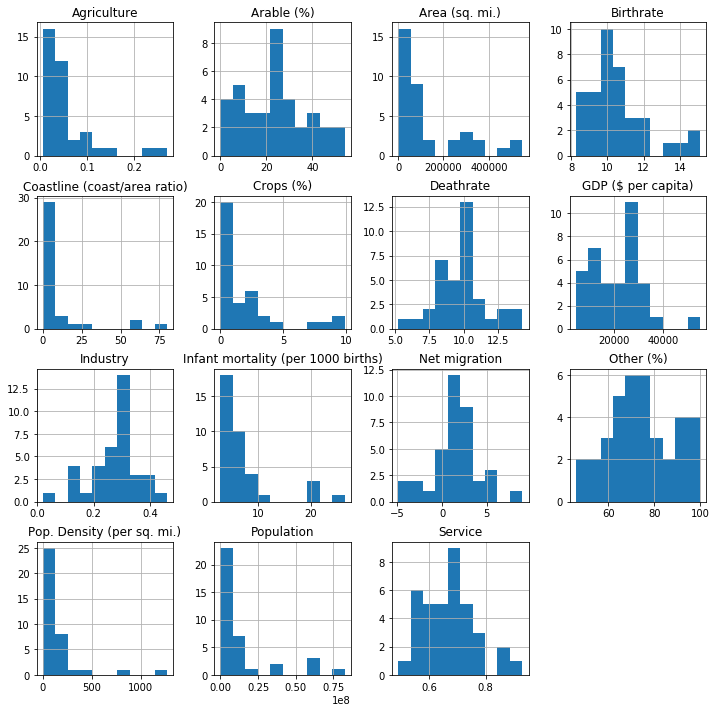

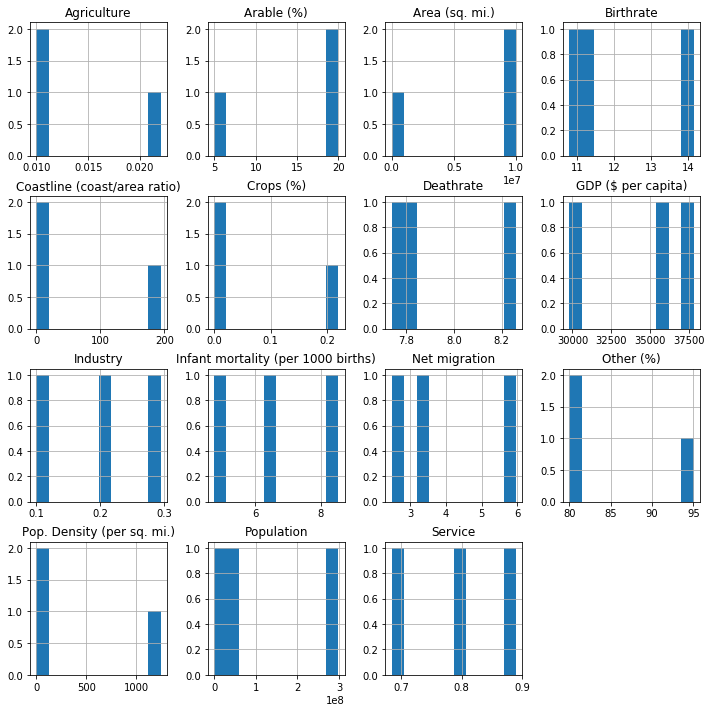

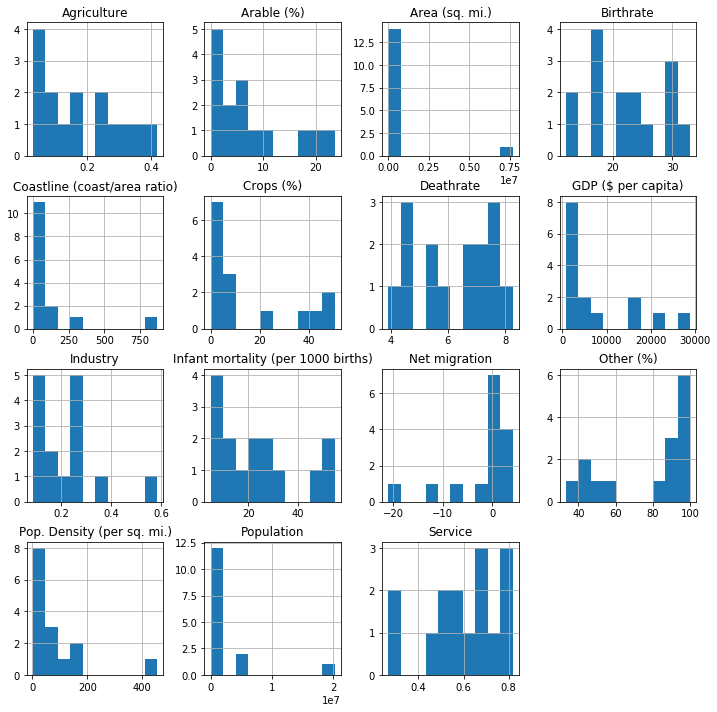

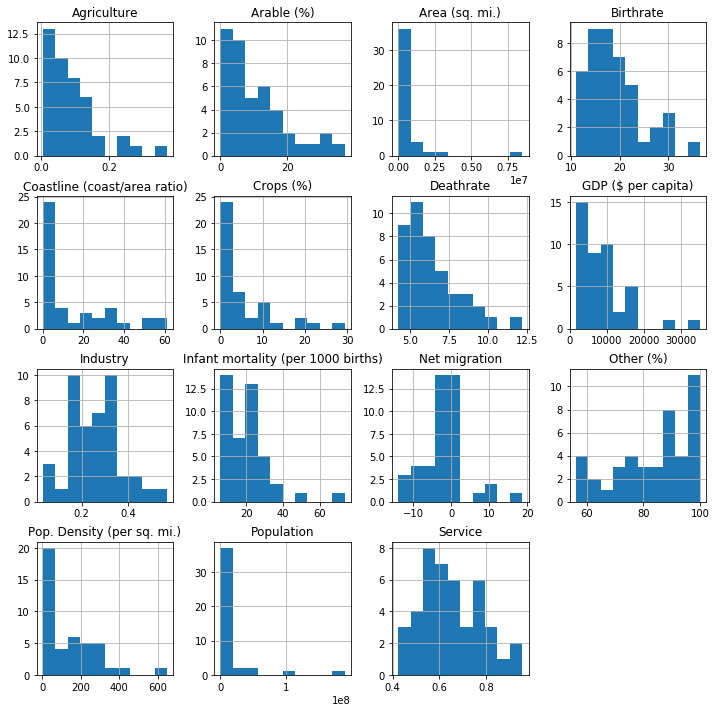

In [21]:
countries_clean.groupby('Region').hist(figsize=(12, 12))

In [22]:
countries_clean.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Arable (%)', 'Crops (%)', 'Other (%)',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [23]:
countries_classify = countries_clean[['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Arable (%)', 'Crops (%)', 'Other (%)',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']]

In [ ]:
countries_classify.Region.value_counts()

# Setting up the data for the classifier

In [1]:
X = countries_classify.iloc[:, 3:-1].values
Y = countries_classify.iloc[:, 1:2].values

NameError: name 'countries_clean' is not defined

In [2]:
print(countries_classify.groupby('Region').size())

NameError: name 'countries_clean' is not defined

In [3]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

NameError: name 'LabelEncoder' is not defined

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train)

In [ ]:
classifier.class_prior_

# Predictions

In [ ]:
Y_pred = classifier.predict(X_test_scaled)
Y_pred

In [ ]:
## Calculate accuracy using formula 
acc= np.mean(Y_test==Y_pred)
print( acc)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)
